#SOCIAL MEDIA COMPUTING ASSIGNMENT PART 1
### Lamborghini



#### Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Import Libraries

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

#### Read Dataset

In [3]:
#dataset_bmw.json
#dataset_mercedes.json
#dataset_honda.json
#dataset_lambo.json

# Read the JSON file
with open('/content/drive/MyDrive/CollegeDocument/Degree(3rd Year)(Sem 2)/Social Media Computing/Assignment/Lamborghini/Lamborghini_Dataset.json', 'r') as file:
    data = json.load(file)

# Create a DataFrame from the JSON data
df = pd.DataFrame(data)
display(df.head(2))

,user,id,conversation_id,full_text,reply_count,retweet_count,favorite_count,hashtags,symbols,user_mentions,...,media,url,created_at,view_count,quote_count,is_quote_tweet,is_retweet,is_truncated,startUrl,replying_to_tweet
0,"{'created_at': '2011-06-24T16:41:15.000Z', 'de...",1659473606630338561,1659473606630338561,Not a Super Sports Car. THE Super Sports Car.\...,21,60,525,"[Lamborghini, Countach]",[],[],...,[],https://twitter.com/Lamborghini/status/1659473...,2023-05-19T08:18:34.000Z,29926,3,False,False,False,https://twitter.com/Lamborghini,NaN
1,"{'created_at': '2011-06-24T16:41:15.000Z', 'de...",1659183430976905217,1659183430976905217,"Beyond the concrete, there is another kind of ...",16,106,803,[],[],[],...,[],https://twitter.com/Lamborghini/status/1659183...,2023-05-18T13:05:30.000Z,63055,7,False,False,False,https://twitter.com/Lamborghini,NaN


#### Bar Chart of Frequency of Hashtags

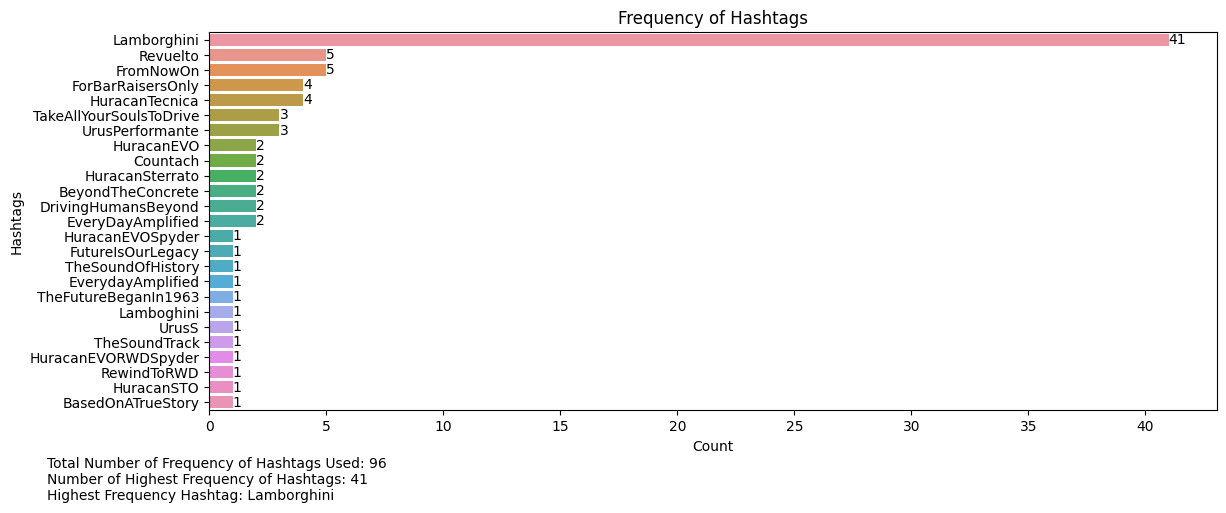

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

hashtags = df['hashtags'].explode().value_counts()

plt.figure(figsize=(13, 6))
ax = sns.barplot(y=hashtags.index, x=hashtags.values)
plt.title('Frequency of Hashtags')
plt.ylabel('Hashtags')
plt.xlabel('Count')

# Add count labels to each bar
for i, v in enumerate(hashtags.values):
    ax.text(v, i, str(v), color='black', va='center')

# Calculate total number of hashtag frequencies
total_frequency = len(df['hashtags'].explode())

# Calculate highest frequency of hashtags
highest_frequency = hashtags.values[0]
highest_frequency_name = hashtags.index[0]

# Add information below the chart
info_text = f'Total Number of Frequency of Hashtags Used: {total_frequency}\nNumber of Highest Frequency of Hashtags: {highest_frequency}\nHighest Frequency Hashtag: {highest_frequency_name}'
plt.figtext(0, 0.1, info_text, ha='left', fontsize=10)

plt.subplots_adjust(bottom=0.25)  # Adjust the bottom margin

plt.savefig('hashtags_chart.png', bbox_inches='tight')  # Use bbox_inches='tight' to include the entire figure
plt.show()
plt.close()


#### Bar Chart of Frequency of URLs Mentioned

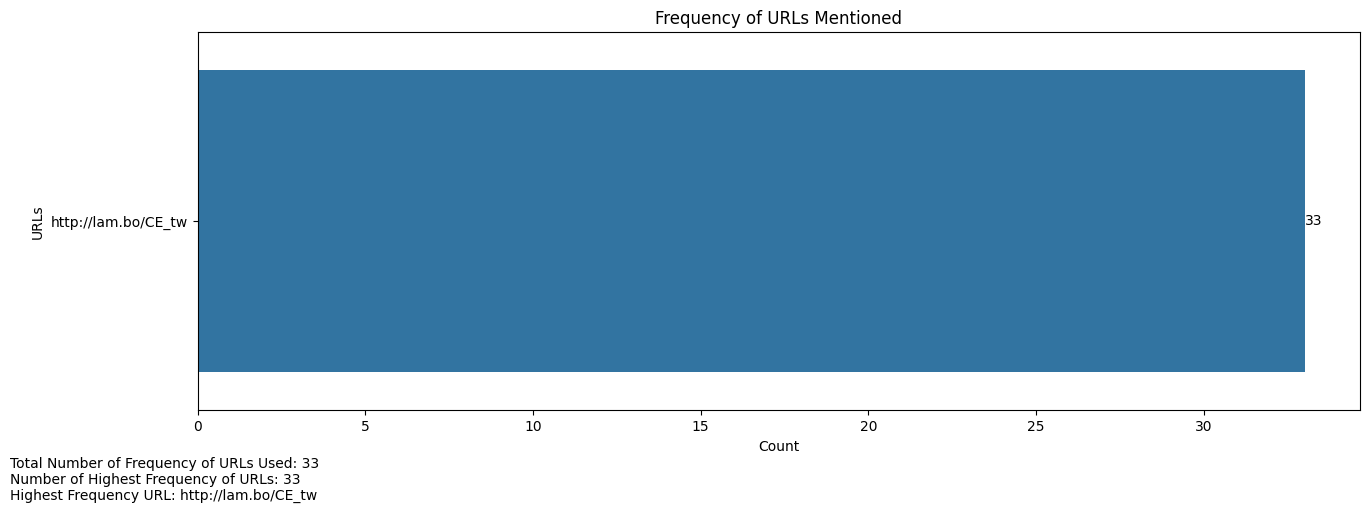

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Extract URLs from the 'urls' column
urls = [url['expanded_url'] for url in df['urls'].explode() if isinstance(url, dict)]

# Count the frequency of URLs
urls_counts = dict(Counter(urls))

# Sort the URLs by count in descending order
sorted_urls = sorted(urls_counts.items(), key=lambda x: x[1], reverse=True)
sorted_urls = dict(sorted_urls)

# Plot the bar chart
plt.figure(figsize=(15, 6))
ax = sns.barplot(y=list(sorted_urls.keys()), x=list(sorted_urls.values()))
plt.title('Frequency of URLs Mentioned')
plt.ylabel('URLs')
plt.xlabel('Count')

# Add count labels to each bar
for i, v in enumerate(list(sorted_urls.values())):
    ax.text(v, i, str(v), color='black', va='center')

# Calculate total number of URL frequencies
total_frequency = sum(list(sorted_urls.values()))

# Calculate highest frequency of URLs and the URL itself
highest_frequency = max(sorted_urls.values())
highest_frequency_url = [url for url, freq in sorted_urls.items() if freq == highest_frequency][0]

# Add information below the chart
info_text = f'Total Number of Frequency of URLs Used: {total_frequency}\nNumber of Highest Frequency of URLs: {highest_frequency}\nHighest Frequency URL: {highest_frequency_url}'
plt.figtext(0, 0.1, info_text, ha='left', fontsize=10)

plt.subplots_adjust(bottom=0.25)  # Adjust the bottom margin

plt.savefig('urls_chart.png', bbox_inches='tight')  # Use bbox_inches='tight' to include the entire figure
plt.show()
plt.close()

#### Pie Chart of Distribution of Media Types

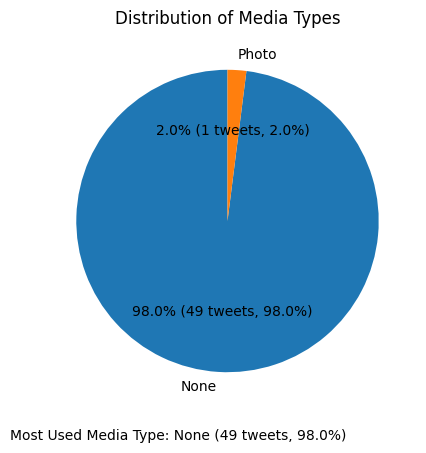

In [6]:
import matplotlib.pyplot as plt

media_types = df['media'].apply(lambda x: 'Photo' if any(m['type'] == 'photo' for m in x) else 'Video' if any(m['type'] == 'video' for m in x) else 'None')
media_counts = media_types.value_counts()

plt.figure(figsize=(6, 6))
patches, texts, autotexts = plt.pie(media_counts, labels=media_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Media Types')

# Calculate the most used media type and its count
most_used_media = media_counts.idxmax()
most_used_media_count = media_counts.max()
most_used_media_percentage = media_counts.max() / media_counts.sum() * 100

# Add text below each percentage
for i, autotext in enumerate(autotexts):
    count = media_counts[i]
    percentage = media_counts[i] / media_counts.sum() * 100
    autotext.set_text(f'{autotext.get_text()} ({count} tweets, {percentage:.1f}%)')

# Add text below the chart
info_text = f"Most Used Media Type: {most_used_media} ({most_used_media_count} tweets, {most_used_media_percentage:.1f}%)"
plt.figtext(0.15, 0.2, info_text, ha='left')


plt.subplots_adjust(bottom=0.25)  # Adjust the bottom margin

plt.savefig('media_chart.png', bbox_inches='tight')  # Use bbox_inches='tight' to include the entire figure
plt.show()
plt.close()


#### Line Chart of Daily Tweet Activitiy

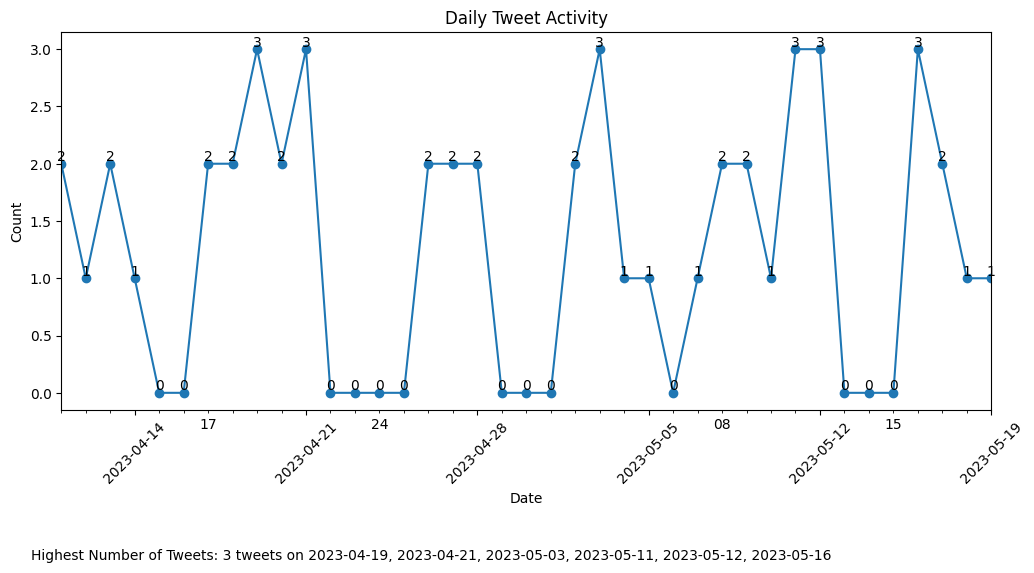

In [7]:
import matplotlib.dates as mdates

df['created_at'] = pd.to_datetime(df['created_at'])
daily_tweet_count = df['created_at'].dt.date.value_counts().sort_index()

# Create a date range with all dates
date_range = pd.date_range(start=daily_tweet_count.index.min(), end=daily_tweet_count.index.max(), freq='D')

# Reindex the daily_tweet_count series with the date range
daily_tweet_count = daily_tweet_count.reindex(date_range, fill_value=0)

plt.figure(figsize=(12, 6))
daily_tweet_count.plot(marker='o')
plt.title('Daily Tweet Activity')
plt.xlabel('Date')
plt.ylabel('Count')

# Set ticker locator and formatter for x-axis
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Add number of tweets on the line plot
for date, count in daily_tweet_count.items():
    plt.text(date, count, str(count), ha='center', va='bottom')

# Calculate the dates with the highest number of tweets
highest_tweet_dates = daily_tweet_count.index[daily_tweet_count == daily_tweet_count.max()]
highest_tweet_count = daily_tweet_count.max()

# Format the dates to display only the date part
highest_tweet_dates_str = ', '.join(date.strftime('%Y-%m-%d') for date in highest_tweet_dates)

# Add text below the chart
info_text = f"Highest Number of Tweets: {highest_tweet_count} tweets on {highest_tweet_dates_str}"
plt.figtext(0.1, 0, info_text, ha='left')


plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.25)  # Adjust the bottom margin

plt.savefig('tweet_activity_chart.png', bbox_inches='tight')  # Use bbox_inches='tight' to include the entire figure
plt.show()
plt.close()


In [8]:
daily_tweet_count

2023-04-11    2
2023-04-12    1
2023-04-13    2
2023-04-14    1
2023-04-15    0
2023-04-16    0
2023-04-17    2
2023-04-18    2
2023-04-19    3
2023-04-20    2
2023-04-21    3
2023-04-22    0
2023-04-23    0
2023-04-24    0
2023-04-25    0
2023-04-26    2
2023-04-27    2
2023-04-28    2
2023-04-29    0
2023-04-30    0
2023-05-01    0
2023-05-02    2
2023-05-03    3
2023-05-04    1
2023-05-05    1
2023-05-06    0
2023-05-07    1
2023-05-08    2
2023-05-09    2
2023-05-10    1
2023-05-11    3
2023-05-12    3
2023-05-13    0
2023-05-14    0
2023-05-15    0
2023-05-16    3
2023-05-17    2
2023-05-18    1
2023-05-19    1
Freq: D, Name: created_at, dtype: int64

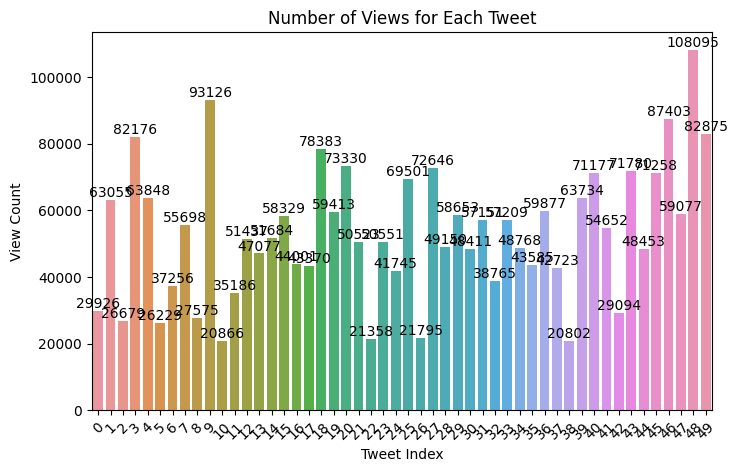

In [9]:
views_counts = df['view_count']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df.index, y=views_counts)
plt.title('Number of Views for Each Tweet')
plt.xlabel('Tweet Index')
plt.ylabel('View Count')
plt.xticks(rotation=45)

# Add counter at the top of the bar chart
for i, v in enumerate(views_counts):
    ax.text(i, v, str(v), color='black', ha='center', va='bottom')

plt.subplots_adjust(bottom=0.25)  # Adjust the bottom margin

plt.savefig('views.png', bbox_inches='tight')  # Use bbox_inches='tight' to include the entire figure
plt.show()
plt.close()


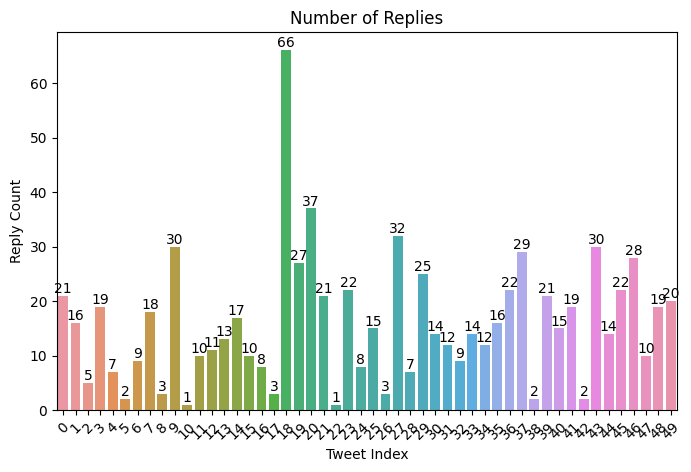

In [10]:
replies_counts = df['reply_count']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df.index, y=replies_counts)
plt.title('Number of Replies')
plt.xlabel('Tweet Index')
plt.ylabel('Reply Count')
plt.xticks(rotation=45)

# Add counter at the top of the bar chart
for i, v in enumerate(replies_counts):
    ax.text(i, v, str(v), color='black', ha='center', va='bottom')

plt.subplots_adjust(bottom=0.25)  # Adjust the bottom margin

plt.savefig('replies.png', bbox_inches='tight')  # Use bbox_inches='tight' to include the entire figure
plt.show()
plt.close()


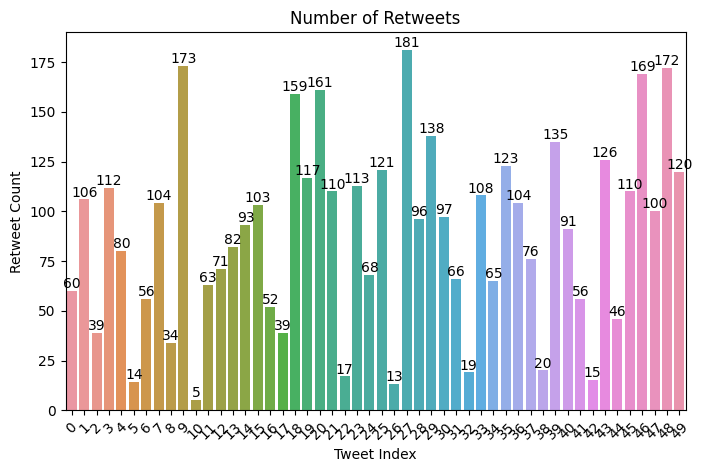

In [11]:
retweets_counts = df['retweet_count']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df.index, y=retweets_counts)
plt.title('Number of Retweets')
plt.xlabel('Tweet Index')
plt.ylabel('Retweet Count')
plt.xticks(rotation=45)

# Add counter at the top of the bar chart
for i, v in enumerate(retweets_counts):
    ax.text(i, v, str(v), color='black', ha='center', va='bottom')

plt.subplots_adjust(bottom=0.25)  # Adjust the bottom margin

plt.savefig('retweets.png', bbox_inches='tight')  # Use bbox_inches='tight' to include the entire figure
plt.show()
plt.close()

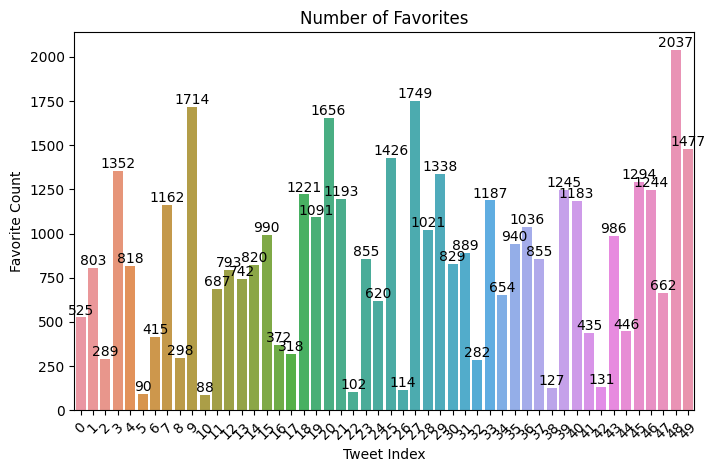

In [12]:
favorites_counts = df['favorite_count']

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=df.index, y=favorites_counts)
plt.title('Number of Favorites')
plt.xlabel('Tweet Index')
plt.ylabel('Favorite Count')
plt.xticks(rotation=45)

# Add counter at the top of the bar chart
for i, v in enumerate(favorites_counts):
    ax.text(i, v, str(v), color='black', ha='center', va='bottom')

plt.subplots_adjust(bottom=0.25)  # Adjust the bottom margin

plt.savefig('favorites.png', bbox_inches='tight')  # Use bbox_inches='tight' to include the entire figure
plt.show()
plt.close()


#### Word Cloud for Most Frequent Used Words

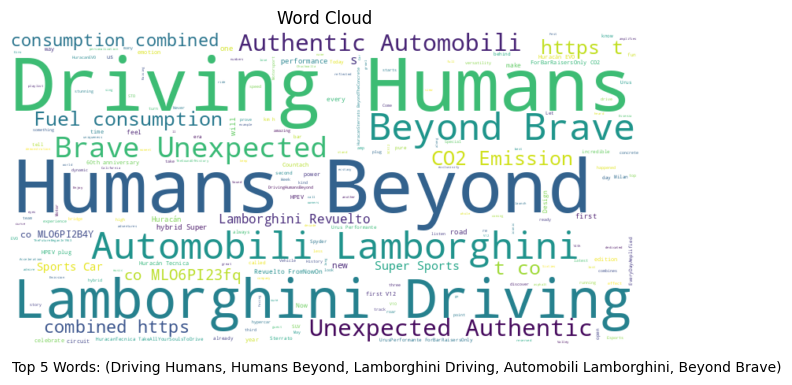

In [13]:
text = ' '.join(df['full_text'].values.tolist() + df['user'].apply(lambda x: x['description']).values.tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud')
plt.axis('off')

# Get the word frequencies from the word cloud
word_frequencies = wordcloud.process_text(text)
sorted_words = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)
top_5_words = [word[0] for word in sorted_words[:5]]

# Add the top 5 words at the bottom of the chart
bottom_text = f"Top 5 Words: ({', '.join(top_5_words)})"
plt.figtext(0.2, 0.2, bottom_text, ha='left', fontsize=10)

plt.subplots_adjust(bottom=0.25)  # Adjust the bottom margin

plt.savefig('wordcloud_chart.png', bbox_inches='tight')  # Use bbox_inches='tight' to include the entire figure
plt.show()
plt.close()


In [14]:
user = data[0]['user']

name = user['name']
description = user['description']
follower_count = user['followers_count']
friends_count = user['friends_count']
location = user['location']

print(user)

{'created_at': '2011-06-24T16:41:15.000Z', 'default_profile_image': False, 'description': 'Automobili #Lamborghini.\nDriving Humans Beyond.\nBrave. Unexpected. Authentic.', 'fast_followers_count': 0, 'favourites_count': 6343, 'followers_count': 2327086, 'friends_count': 1065, 'has_custom_timelines': True, 'is_translator': False, 'listed_count': 4797, 'location': "Sant'Agata Bolognese, Italy", 'media_count': 2660, 'name': 'Lamborghini', 'normal_followers_count': 2327086, 'possibly_sensitive': False, 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/323319539/1683448589', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1655257812480454657/GoASufyF_normal.jpg', 'screen_name': 'Lamborghini', 'statuses_count': 8154, 'translator_type': 'none', 'url': 'https://t.co/H5cFEBsgbY', 'verified': False, 'verified_type': 'Business', 'withheld_in_countries': [], 'id_str': '323319539'}


#### Merge Into One Dashboards

In [15]:
import base64

# Convert each image file to base64 encoding
image_files = ['hashtags_chart.png', 'urls_chart.png', 'media_chart.png', 'tweet_activity_chart.png', 'wordcloud_chart.png','views.png','favorites.png','replies.png','retweets.png']
encoded_images = []
for file in image_files:
    with open(file, 'rb') as f:
        encoded_image = base64.b64encode(f.read()).decode('utf-8')
    encoded_images.append(encoded_image)

# Create the HTML file and embed the base64-encoded images
html_content = f"""
<!DOCTYPE html>
<html>
<head>
  <style>
    body {{
      background-color: #DBF9FC;
      display: flex;
      flex-direction: column;
      align-items: center;
      justify-content: center;
    }}

    h3 {{
      text-align: center;
    }}

    h1, p {{
      display: flex;
      justify-content: center;
    }}

    img {{
      margin: 10px;
    }}
    td {{
        text-align: center;
    }}

  </style>
</head>

<body>
    <h1><strong>Visualization of {name}</strong></h1>

    <table bgcolor = #BAEBEB width = "1600">
        <tr>
        <th>Twitter Name</th>
        <th>Twitter Description</th>
        <th>Followers Count</th>
        <th>Friends Count</th>
        <th>Location</th>
        </tr>

        <tr>
        <td>{name}</td>
        <td>{description}</td>
        <td>{follower_count}</td>
        <td>{friends_count}</td>
        <td>{location}</td>
        </tr>
    </table>
  <h1>
    <img style="font-size: 14px;" src="data:image/png;base64,{encoded_images[5]}" alt="" width="425" height="332.5" />
    <img style="font-size: 14px;" src="data:image/png;base64,{encoded_images[6]}" alt="" width="425" height="332.5" />
    <img style="font-size: 14px;" src="data:image/png;base64,{encoded_images[7]}" alt="" width="425" height="332.5" />
    <img style="font-size: 14px;" src="data:image/png;base64,{encoded_images[8]}" alt="" width="425" height="332.5" />
  </h1>
  <h1>
    <img src="data:image/png;base64,{encoded_images[0]}" alt="" width="875" height="430" />
    <img src="data:image/png;base64,{encoded_images[1]}" alt="" width="842.5" height="430" />
  </h1>
  <h1>
    <img src="data:image/png;base64,{encoded_images[3]}" width="700" height="380" />
    <img src="data:image/png;base64,{encoded_images[2]}" width="350" height="380" />
    <img src="data:image/png;base64,{encoded_images[4]}" width="700" height="380" />
  </h1>
</body>
</html>
"""

# Save the HTML file
with open("Lamborghini_Dashboard.html", 'w') as f:
    f.write(html_content)

from google.colab import files
files.download("Lamborghini_Dashboard.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>